<a href="https://colab.research.google.com/github/LaiTriMinh/project/blob/main/cac_loai_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/cac loai hoa

/content/drive/MyDrive/cac loai hoa


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/cac loai hoa/train',target_size=(150,150), batch_size=32, class_mode='categorical')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cac loai hoa/test',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 379 images belonging to 8 classes.
Found 379 images belonging to 8 classes.


In [6]:
training_set.class_indices
test_set.class_indices

{'hoa cúc': 0,
 'hoa cúc dại': 1,
 'hoa hồng trắng': 2,
 'hoa hồng đỏ': 3,
 'hoa hướng dương': 4,
 'hoa lan': 5,
 'hoa sen': 6,
 'hoa tú cầu': 7}

In [7]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
12/12 [==============================] - 345s 29s/step - loss: 7.5247 - accuracy: 0.1530 - val_loss: 1.9162 - val_accuracy: 0.2665
Epoch 2/100
12/12 [==============================] - 74s 6s/step - loss: 1.7085 - accuracy: 0.3113 - val_loss: 1.3943 - val_accuracy: 0.3799
Epoch 3/100
12/12 [==============================] - 73s 6s/step - loss: 1.4391 - accuracy: 0.4248 - val_loss: 1.2798 - val_accuracy: 0.5198
Epoch 4/100
12/12 [==============================] - 73s 6s/step - loss: 1.3645 - accuracy: 0.4828 - val_loss: 1.0116 - val_accuracy: 0.6834
Epoch 5/100
12/12 [==============================] - 73s 6s/step - loss: 1.0466 - accuracy: 0.6016 - val_loss: 0.8768 - val_accuracy: 0.7018
Epoch 6/100
12/12 [==============================] - 74s 6s/step - loss: 0.8587 - accuracy: 0.6675 - val_loss: 0.6728 - val_accuracy: 0.7124
Epoch 7/100
12/12 [==============================] - 74s 6s/step - loss: 0.6752 - accuracy: 0.7309 - val_loss: 0.7060 - val_accuracy: 0.7071
Epoch 8/100

In [12]:
model.save('hoa.h5')

In [13]:
model_hoa = load_model('hoa.h5')

In [14]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.09535004198551178
Train Accuracy 0.9762532711029053


1/1 [==============================] - 0s 60ms/step
Đây là hoa: hoa cúc dại


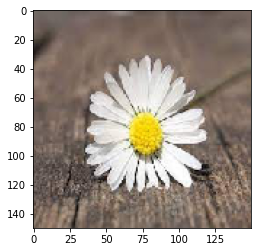

In [16]:
img = load_img('/content/hoacucdai.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_hoa.predict(img)
class_hoa=['hoa cúc',
 'hoa cúc dại',
 'hoa hồng trắng',
 'hoa hồng đỏ',
 'hoa hướng dương',
 'hoa lan',
 'hoa sen',
 'hoa tú cầu']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là hoa:", class_hoa[a])